In [1]:
# This notebook is aimed to deal with the transiant state

In [2]:
from DataPrepocessing import *
from NeuralNets import *
from TrainMethod import *

import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
batch_size = 16 
sequence_length = 10
input_dim = 152

In [4]:
# input_dim, hidden_dim, output_dim, lstm_nums_layer, dropout
model = SimpleLSTM(input_dim, 128,1, 2, 0.05)

model.load_state_dict(torch.load('simple_best.pth'))
model.to(torch.double)
model.eval()

: 

: 

In [ ]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

def eval(data, batch_size, sequence_length):
    # Assuming you have a DataSet object called 'training_data' and a trained model called 'model'
    training_set = data
    # Step 1: Create a DataLoader from your DataSet object
    batch_size = batch_size  # Adjust this value based on your model's input requirements
    train_loader = DataLoader(training_set, batch_size=batch_size, shuffle=False)

    # Step 2 & 3: Iterate through the DataLoader and collect predictions and true labels
    predictions = []
    true_labels = []

    sequence_length = sequence_length  # Assuming a sequence length of 10

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in train_loader:
            # Pass the input data to the trained model and collect the predictions
            preds = model(inputs)
            preds = preds.reshape(-1, sequence_length)  # Reshape the predictions to (batch_size, sequence_length, output_dim)
            predictions.extend(preds.squeeze().view(-1).tolist())  # Flatten the predictions
            true_labels.extend(labels.squeeze().view(-1).tolist())  # Flatten the true labels

    # Step 4: Plot the predictions and true labels for comparison
    loss = nn.MSELoss()
    tensor1 = torch.tensor(predictions)
    tensor2 = torch.tensor(true_labels)
    test_loss = loss(tensor1, tensor2)
    print(test_loss)
    plt.figure()
    plt.xlabel('Timestamp')
    plt.ylabel('Keff')
    plt.plot(true_labels, label="Real")
    plt.plot(predictions, label="Predict", alpha = 0.7)
    plt.legend()
    plt.show()

    return np.array(true_labels), np.array(predictions)


In [ ]:
first_run_data = np.loadtxt('first_run.csv', delimiter= ',', dtype= np.float64)
second_run_data = np.loadtxt('second_run.csv', delimiter= ',', dtype= np.float64)

first_run_data = np.concatenate([first_run_data, second_run_data], axis = 0)

In [ ]:
print(first_run_data.shape)

(1280, 153)


In [ ]:
first_ss = StandardScaler()

first_run_data = first_ss.fit_transform(first_run_data)
first_run_dataset = ReactorData(first_run_data, 10, 0 ,1)


In [ ]:
all_labels, predictions =  eval(first_run_dataset, batch_size, sequence_length)

NameError: name 'batch_size' is not defined

In [ ]:
X = first_run_dataset.unshaped_data
plt.plot(X[0,:])

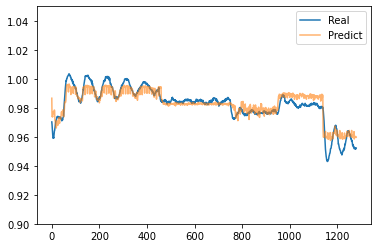

In [ ]:
# change to the original unit
true_labels = all_labels
predictions = predictions
X = first_run_dataset.unshaped_data

result_y = np.append(X, true_labels.reshape(-1,1), axis=1)
result_predict = np.append(X, predictions.reshape(-1,1), axis=1)

y = first_ss.inverse_transform(result_y)
predict = first_ss.inverse_transform(result_predict)

plt.figure()
plt.ylim((0.9,1.05))
plt.plot(y[:,-1], label = "Real")     
plt.plot(predict[:,-1], label = "Predict", alpha = 0.6)
plt.legend()




### For the challenging run

In [ ]:
hard_run_data = np.loadtxt('challenging_run.csv', delimiter= ',', dtype= np.float64)



In [ ]:
hard_ss = StandardScaler()

hard_run_data = first_ss.fit_transform(hard_run_data)
hard_run_dataset = ReactorData(hard_run_data, sequence_length, 0 ,1)


In [ ]:
all_labels, predictions =  eval(hard_run_dataset, batch_size, sequence_length)

In [ ]:
# change to the original unit
true_labels = all_labels
predictions = predictions
X = hard_run_dataset.unshaped_data

result_y = np.append(X, true_labels.reshape(-1,1), axis=1)
result_predict = np.append(X, predictions.reshape(-1,1), axis=1)

y = first_ss.inverse_transform(result_y)
predict = first_ss.inverse_transform(result_predict)

plt.figure()
plt.ylim((0.9,1.05))
plt.plot(y[:,-1], label = "Real")     
plt.plot(predict[:,-1], label = "Predict", alpha = 0.6)
plt.legend()


In [ ]:
### Fine tuning hyperparameters

In [ ]:
# will do this later, specifically wrapping training and evaluation into functions and fine tuning like that

In [ ]:
'''
some points

should add some stable data?
should increse model size?
should do some more data prepocessing?
should use pre-trained model?
'''

'\nsome points\n\nshould add some stable data?\nshould increse model size?\nshould do some more data prepocessing?\nshould use pre-trained model?\n'